# Exploratory Data Analysis

In [59]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [149]:
%store -r data_daily data_hourly

# Defs

In [ ]:
def agg_data_frame(df: pd.DataFrame(), by, agg_map: dict) -> pd.DataFrame:
    '''
    Aggregate hourly or daily Dataframe by
    '''
    try:
        df_agg = df.groupby(by=by).agg(agg_map)
        # data_daily_year = data_daily_year.rename(columns=lambda x: '_'.join(x))# TODO does not work for some feckin reason
        df_agg.columns = df_agg.columns.map('_'.join)
        if 'wmo_code_<lambda>' in df_agg.columns:
            df_agg = df_agg.rename(columns={'wmo_code_<lambda>':'wmo_codes'})
        return df_agg
    except:
        raise Exception('error in agg_data_frame')


# Data Overview

In [108]:
data_daily.head()

,casual,date,member,total_rides,apparent_temperature_mean,temperature_2m_mean,wmo_code,windspeed_10m_max
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2


In [150]:
data_hourly.head()

,casual,member,total_rides,relativehumidity_2m,temperature_2m,wmo_code,windspeed_10m,datetime
0,20,26,46,90,2.4,1,10.2,2021-01-01 00:00:00
1,23,23,46,88,1.8,1,10.0,2021-01-01 01:00:00
2,20,28,48,87,1.1,2,10.1,2021-01-01 02:00:00
3,9,7,16,81,1.6,2,10.6,2021-01-01 03:00:00
4,7,5,12,77,1.6,2,9.9,2021-01-01 04:00:00


# Aggregate Data

In [157]:
# aggregate daily data
agg_map_daily = {
    'casual' : ['sum', 'mean', 'std'],
    'member' : ['sum', 'mean', 'std'],
    'total_rides' : ['sum', 'mean', 'std'],
    'apparent_temperature_mean' : 'mean',
    'temperature_2m_mean' : 'mean',
    'wmo_code' : lambda x: ', '.join(str(x)),
    'windspeed_10m_max' : 'max'
    }

data_daily_year = agg_data_frame(data_daily, data_daily.date.dt.year, agg_map_daily)
data_daily_month = agg_data_frame(data_daily, data_daily.date.dt.month, agg_map_daily)
# data_daily_weekday = agg_data_frame(data_daily, data_daily.date.dt.month, agg_map_daily)
data_daily_year.head()

,casual_sum,casual_mean,casual_std,member_sum,member_mean,member_std,total_rides_sum,total_rides_mean,total_rides_std,apparent_temperature_mean_mean,temperature_2m_mean_mean,wmo_codes,windspeed_10m_max_max
date,,,,,,,,,,,,,
2021,1116554,3059.052055,1781.143146,1633327,4474.868493,1706.080462,2749881,7533.920548,3112.366188,13.775616,14.690411,"0, , , , , , , 6, 3, \n, 1, , , , , ...",36.7
2022,1431677,3922.402740,2226.069992,2045105,5603.027397,1919.043446,3476782,9525.430137,3809.983862,12.890685,14.013699,"3, 6, 5, , , , , 6, 3, \n, 3, 6, 6, , , ...",33.3
2023,1652972,4528.690411,2054.539992,2814362,7710.580822,2363.844647,4467334,12239.271233,3983.046929,11.843014,14.534247,"7, 3, 0, , , , , , , 1, \n, 7, 3, 1, , ...",40.1


In [158]:
# aggregate daily data
agg_map_hourly = {
    'casual'                : ['sum', 'mean', 'std'],
    'member'                : ['sum', 'mean', 'std'],
    'total_rides'           : ['sum', 'mean', 'std'],
    'relativehumidity_2m'   : ['min', 'mean', 'max'],
    'windspeed_10m'         : ['min', 'mean', 'max'],
    'wmo_code' : lambda x: ', '.join(str(x))
    }

data_hourly_year = agg_data_frame(data_hourly, data_hourly.datetime.dt.year, agg_map_hourly)
data_hourly_month = agg_data_frame(data_hourly, data_hourly.datetime.dt.month, agg_map_hourly)
data_hourly_hour = agg_data_frame(data_hourly, data_hourly.datetime.dt.hour, agg_map_hourly)
data_hourly_year.head()

,casual_sum,casual_mean,casual_std,member_sum,member_mean,member_std,total_rides_sum,total_rides_mean,total_rides_std,relativehumidity_2m_min,relativehumidity_2m_mean,relativehumidity_2m_max,windspeed_10m_min,windspeed_10m_mean,windspeed_10m_max,wmo_codes
datetime,,,,,,,,,,,,,,,,
2021,1116554,127.577011,136.971162,1633327,186.623286,165.148069,2749881,314.200297,283.957139,24,69.096321,100,0.0,9.915791,36.7,"0, , , , , , , , , 1, \n, 1, , , , ..."
2022,1431677,163.470770,173.523574,2045105,233.512788,203.397261,3476782,396.983558,357.953690,23,68.845284,100,0.4,10.361110,33.3,"8, 7, 5, 2, , , , , , 5, 3, \n, 8, 7, 5, ..."
2023,1652972,188.716977,182.315155,2814362,321.310880,272.503268,4467334,510.027857,435.084159,5,50.952506,100,0.0,10.233908,40.1,"1, 7, 5, 1, 0, , , , , 0, \n, 1, 7, 5, 1, ..."


## Number of rides

### per year

<Axes: xlabel='date', ylabel='total_rides_sum'>

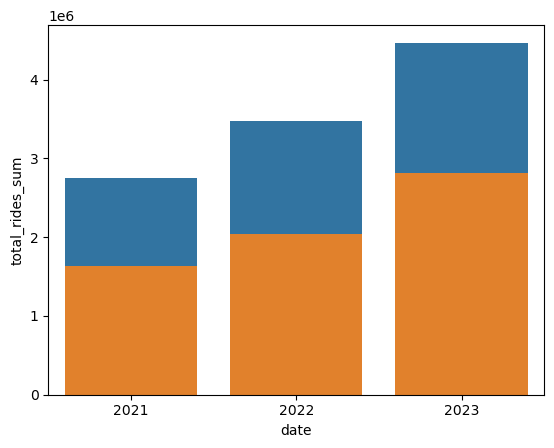

In [ ]:
# TODO plot fraction of members
sns.barplot(data_daily_year, x='date', y='total_rides_sum')
sns.barplot(data_daily_year, x='date', y='member_sum')

plt.show()

- The total number of rides has continuously been increasing from 2021 to 2023.
- The fraction of members has also been increasing.

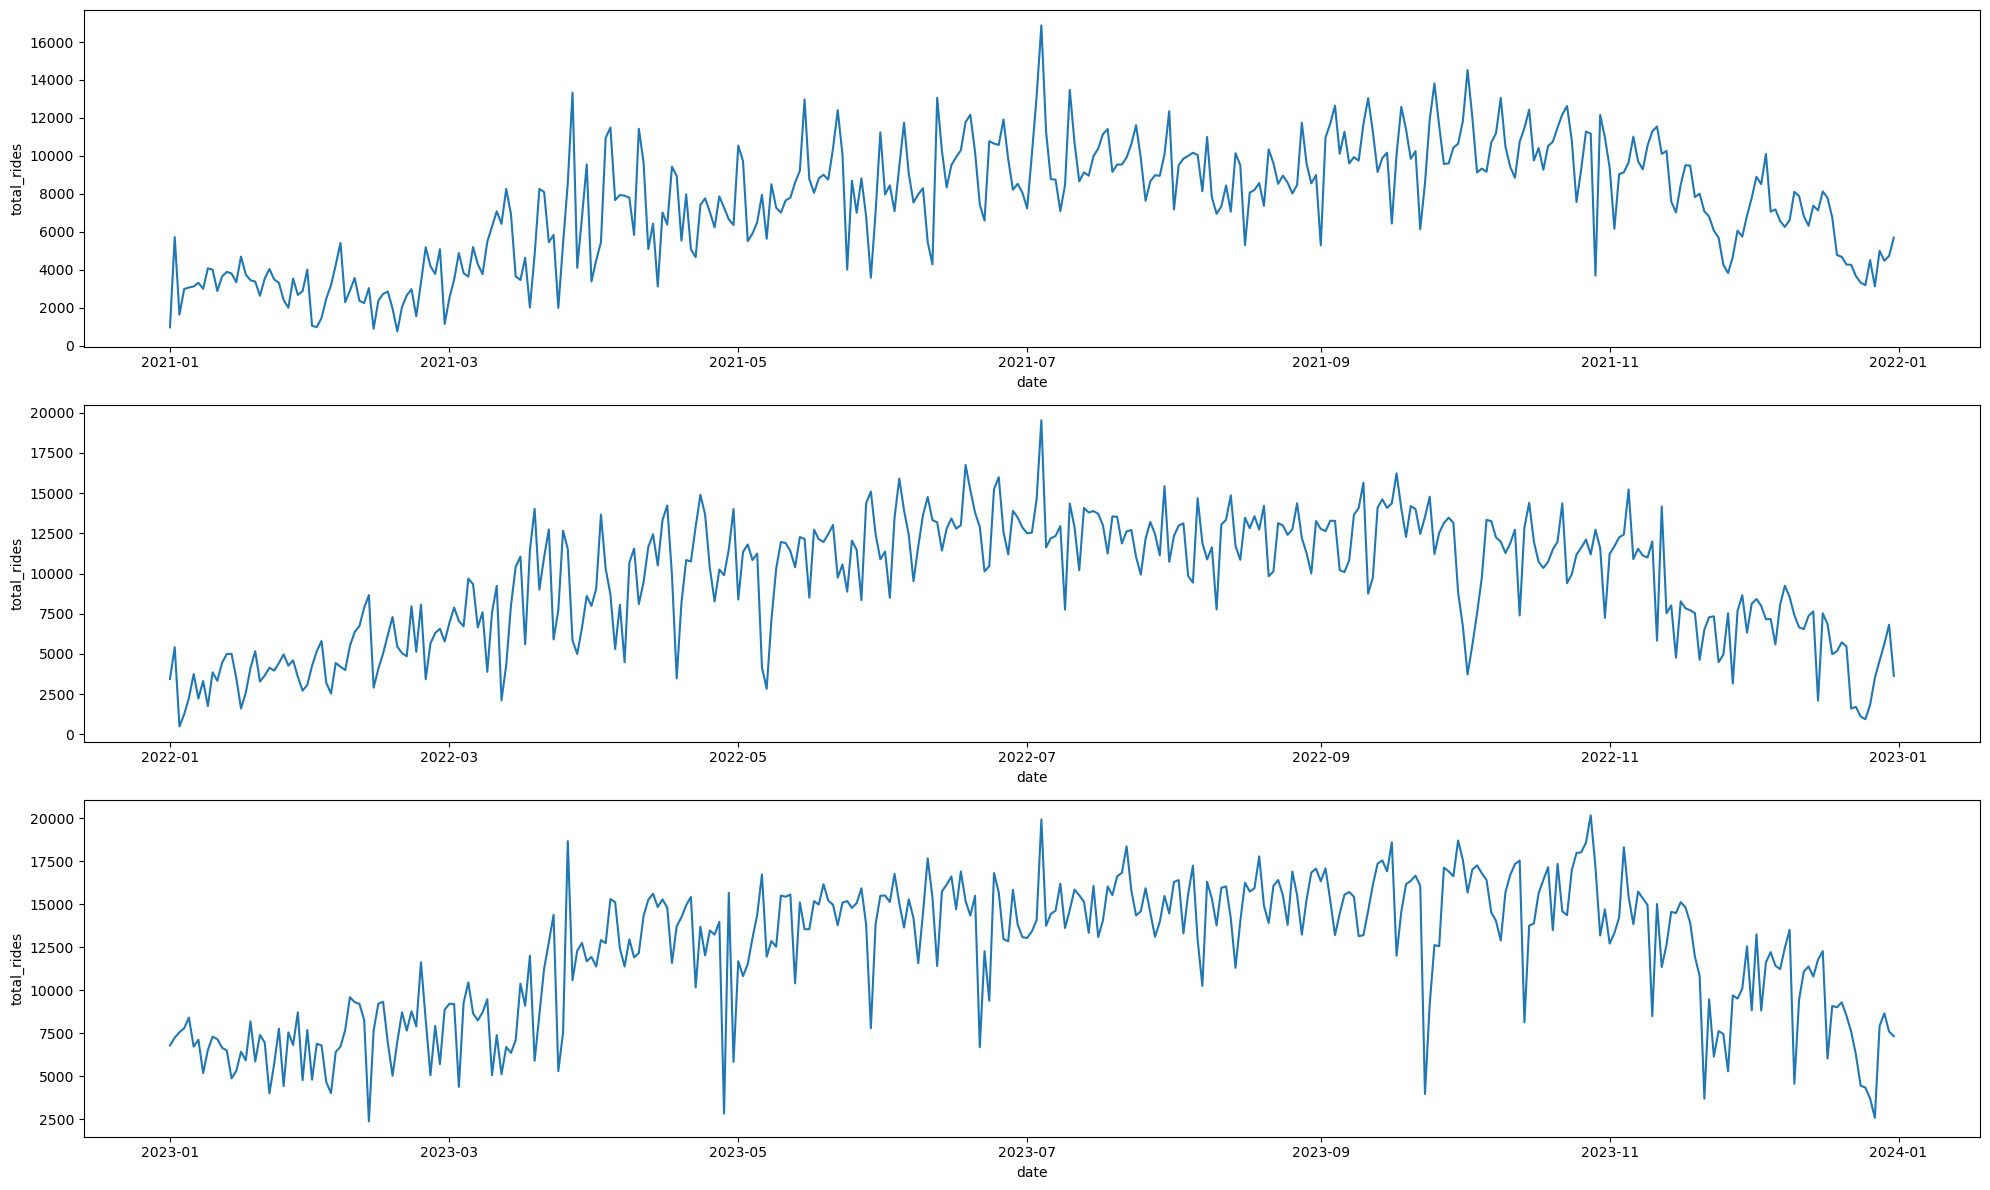

In [153]:
fig, ax = plt.subplots(3, 1, figsize=(20,12))
ax = ax.flatten()

plot = sns.lineplot(data=data_daily[data_daily.date.dt.year==2021], x='date', y='total_rides', ax=ax[0])
plot = sns.lineplot(data=data_daily[data_daily.date.dt.year==2022], x='date', y='total_rides', ax=ax[1])
plot = sns.lineplot(data=data_daily[data_daily.date.dt.year==2023], x='date', y='total_rides', ax=ax[2])

plt.tight_layout()
plt.show()

### per month

In [ ]:
data_daily_month = data_daily.groupby(by=data_daily.date.dt.month).agg(agg_map)
data_daily_month.columns = data_daily_month.columns.map('_'.join)
data_daily_month = data_daily_month.rename(columns={'wmo_code_<lambda>':'wmo_codes'})
data_daily_month.head()

,total_rides_sum,total_rides_mean,total_rides_std,apparent_temperature_mean_mean,temperature_2m_mean_mean,wmo_codes,windspeed_10m_max_max
date,,,,,,,
1,413766,4449.096774,1895.459667,-1.125806,2.797849,"0, , , , , , , 6, 3, \n, 1, , , , , ...",30.3
2,439413,5231.107143,2511.782936,0.552381,4.404762,"3, 1, , , , , , 7, 3, \n, 3, 2, , , , ...",32.4
3,715845,7697.258065,3207.110835,5.379570,8.668817,"5, 9, , , , , , 6, 3, \n, 6, 0, , , , ...",34.5
4,916441,10182.677778,3470.714283,11.536667,13.684444,"9, 0, , , , , , 5, 3, \n, 9, 1, , , , ...",36.7
5,1018950,10956.451613,3246.110058,17.351613,17.967742,"1, 2, 0, , , , , , 1, \n, 1, 2, 1, , , ...",27.0


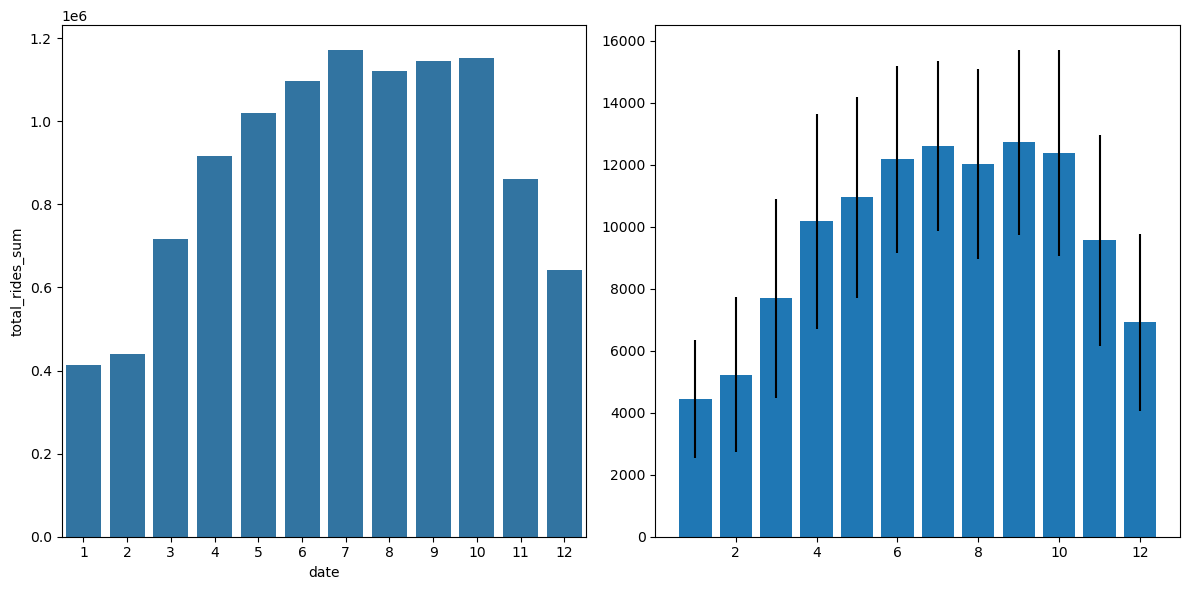

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))

sns.barplot(ax=ax[0], data=data_daily_month, x='date', y='total_rides_sum')
# sns.barplot(ax=ax[1], data=data_daily_month, x='date', y='total_rides_mean')
plt.bar(x=data_daily_month.index, height=data_daily_month.total_rides_mean, yerr=data_daily_month.total_rides_std)
# plt.errorbar(x=data_daily_month.index, y=data_daily_month.total_rides_mean, yerr=data_daily_month.total_rides_std)

plt.tight_layout()

## per weekday
- Compare average and season: How does it shift? 
- 

- How to explain the minima?
- How to explain the maxima?

## Number of rides and weather conditions

## Apparent Temperature

In [ ]:
data_daily.apparent_temperature_mean.describe() 

count    1095.000000
mean       12.836438
std        11.889420
min       -15.200000
25%         2.700000
50%        13.100000
75%        23.400000
max        34.700000
Name: apparent_temperature_mean, dtype: float64

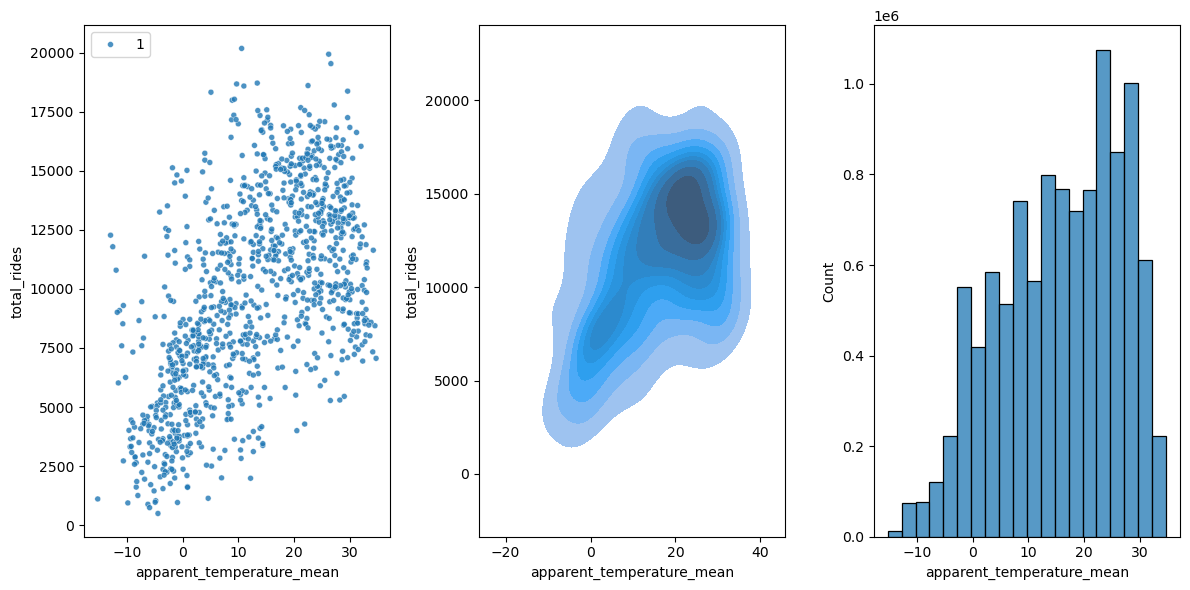

In [142]:
fig, ax = plt.subplots(1, 3, figsize=(12,6))
ax = ax.flatten()

sns.scatterplot(ax=ax[0], data=data_daily, y='total_rides', x='apparent_temperature_mean', size=1, alpha=0.8)
sns.kdeplot(ax=ax[1], data=data_daily, y='total_rides', weights='total_rides', x='apparent_temperature_mean', fill=True)
sns.histplot(ax=ax[2], data=data_daily, x='apparent_temperature_mean', weights='total_rides', bins=20)

plt.tight_layout()

- The total rides per day are higher on days when the weather is good, even at high temperatures.
- The number of rides decreases strongly with apparent temperatures of above 30
- Check with the hourly data:
  - separate day and night

## Windspeed

c:\Users\olive\anaconda3\envs\base_data_analysis\Lib\site-packages\seaborn\distributions.py:413: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


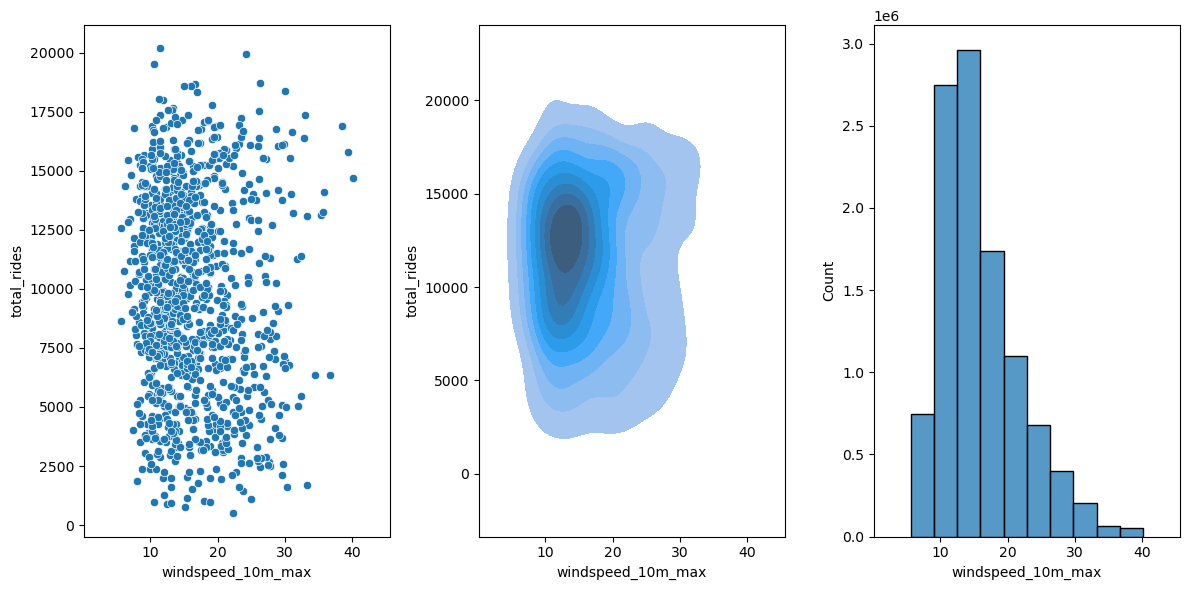

In [147]:
# TODO remove the windspeed outliers for this plot?
fig, ax = plt.subplots(1, 3, figsize=(12,6), sharex=True)
ax = ax.flatten()

sns.scatterplot(ax=ax[0], data=data_daily, y='total_rides', x='windspeed_10m_max')
sns.kdeplot(ax=ax[1], data=data_daily, y='total_rides', x='windspeed_10m_max', weights='total_rides', fill=True)
sns.histplot(ax=ax[2], data=data_daily, x='windspeed_10m_max', weights='total_rides')

plt.tight_layout()